In [1]:
# 1. Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
import seaborn as sns # Used for enhanced visualizations, optional


In [2]:
# 2. Load the Iris Dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)


In [5]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
iris_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [7]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
# select the features
X = iris_df.iloc[:, [0, 1, 2, 3]].values

In [14]:
wcss = []
k = 20
for i in range(1, k+1):
    kmeans = KMeans(n_clusters = i,
                    max_iter = 300, n_init = 10, random_state = 0) # n_init=10 runs algorithm 10 times with different seeds
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

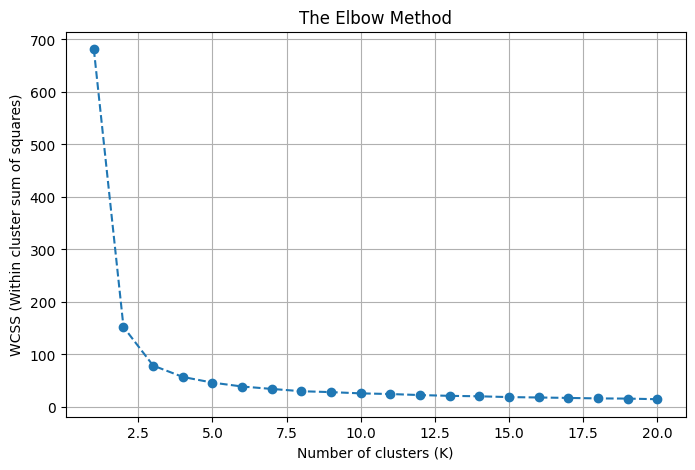

In [15]:
# Visualize

plt.figure(figsize=(8, 5))
plt.plot(range(1, k+1), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS (Within cluster sum of squares)') # Within cluster sum of squares
plt.grid(True)
plt.show()

In [17]:
# from graph optimal K is 3 (elbow point)

optimal_k = 3
kmeans = KMeans(n_clusters = optimal_k,
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [18]:
print("Cluster assignments for the first few data points:")
print(y_kmeans[:10])

Cluster assignments for the first few data points:
[1 1 1 1 1 1 1 1 1 1]


In [19]:
centroids = kmeans.cluster_centers_
print("\nCluster Centroids:")
print(centroids)


Cluster Centroids:
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]



--- Visualizing Clusters (using Sepal Length vs Sepal Width) ---


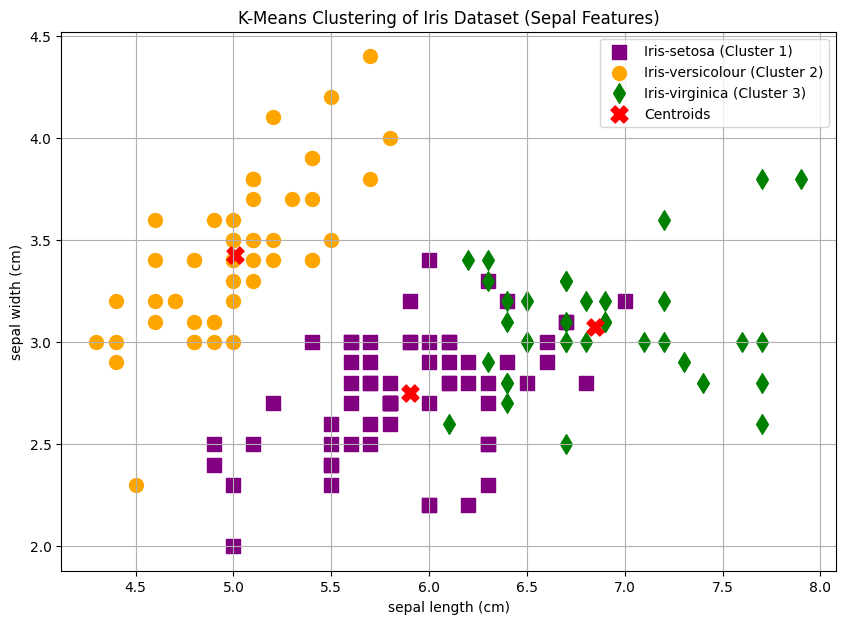

In [25]:
print("\n--- Visualizing Clusters (using Sepal Length vs Sepal Width) ---")

plt.figure(figsize=(10, 7))

# Scatter plot for data points in each cluster
# We use y_kmeans == 0, 1, or 2 to select data points belonging to each cluster
# X[y_kmeans == 0, 0] -> Selects rows where cluster is 0, and the first feature (Sepal Length)
# X[y_kmeans == 0, 1] -> Selects rows where cluster is 0, and the second feature (Sepal Width)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1],
            s = 100, c = 'purple', label = 'Iris-setosa (Cluster 1)', marker = 's')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1],
            s = 100, c = 'orange', label = 'Iris-versicolour (Cluster 2)', marker = 'o')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica (Cluster 3)', marker = 'd')

# Plotting the centroids of the clusters
# centroids[:, 0] -> First feature (Sepal Length) of all centroids
# centroids[:, 1] -> Second feature (Sepal Width) of all centroids
plt.scatter(centroids[:, 0], centroids[:,1],
            s = 150, c = 'red', label = 'Centroids', marker='X')

plt.title('K-Means Clustering of Iris Dataset (Sepal Features)')
plt.xlabel(iris.feature_names[0]) # Sepal length
plt.ylabel(iris.feature_names[1]) # Sepal width
plt.legend()
plt.grid(True)
plt.show()

In [22]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
labels = kmeans.labels_

# Evaluate clustering without using true labels
silhouette = silhouette_score(X, labels)
calinski = calinski_harabasz_score(X, labels)
davies = davies_bouldin_score(X, labels)

print("Silhouette Score:", round(silhouette, 3))
print("Calinski-Harabasz Index:", round(calinski, 3))
print("Davies-Bouldin Index:", round(davies, 3))

Silhouette Score: 0.553
Calinski-Harabasz Index: 561.628
Davies-Bouldin Index: 0.662


## Manual Implementation

In [31]:
iris = datasets.load_iris()
iris_data = pd.DataFrame(iris.data, columns = iris.feature_names)

In [34]:
from sklearn.datasets import load_iris
import random

# Load iris dataset
iris = load_iris()
data = iris.data.tolist()  # Convert NumPy array to list

# Euclidean distance
def euclidean_distance(a, b):
    return sum((x - y) ** 2 for x, y in zip(a, b)) ** 0.5

# Assign points to nearest centroid
def assign_clusters(data, centroids):
    clusters = [[] for _ in centroids]
    for point in data:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        closest_index = distances.index(min(distances))
        clusters[closest_index].append(point)
    return clusters

# Update centroids
def update_centroids(clusters):
    new_centroids = []
    for cluster in clusters:
        if cluster:
            mean = [sum(dim) / len(cluster) for dim in zip(*cluster)]
        else:
            mean = [0] * len(clusters[0][0])
        new_centroids.append(mean)
    return new_centroids

# K-means algorithm
def k_means(data, k, max_iterations=100):
    centroids = random.sample(data, k)  # Initial centroids
    for _ in range(max_iterations):
        clusters = assign_clusters(data, centroids)
        new_centroids = update_centroids(clusters)
        if new_centroids == centroids:
            break
        centroids = new_centroids
    return clusters, centroids



In [35]:
# Run K-means
k = 3
clusters, centroids = k_means(data, k)

# Print results
for idx, cluster in enumerate(clusters):
    print(f"Cluster {idx + 1}: {len(cluster)} points")



Cluster 1: 50 points
Cluster 2: 38 points
Cluster 3: 62 points
